#First Get The Data
##Download And Upload Data 
**data link**:  https://drive.google.com/file/d/1dbcWabr3Xrr4JvuG0VxTiweGzHn-YYvW/view

**Train Data** : Train data contains the 200 images of each cars and planes i.e. total their are 400 images in the training dataset


**Test Data** : Test data contains 50 images of each cars and planes i.e. total their are 100 images in the test dataset

In [0]:
!ls

In [0]:
!unzip v_data.zip

In [0]:
# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
#Files saving lib
import pickle
# Import numpy and fore it to print full array
import numpy as np
# Import sys
import sys
np.set_printoptions(threshold=sys.maxsize)
dataDir = "/content/v_data/test/cars"
#print(dataDir)

#File opening work for checking

In [0]:
!pwd

/content


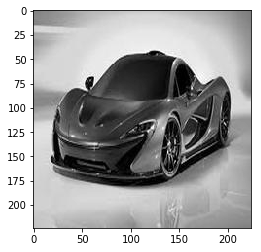

In [0]:
for img in os.listdir(dataDir):
    #print(img)
    img_array = cv2.imread(os.path.join(dataDir,img),cv2.IMREAD_GRAYSCALE)
    #print(img_array)
    #print(len(img_array))
    new_img_array = cv2.resize(img_array,(224,224))
    plt.imshow(new_img_array,cmap="gray")
    plt.show()
    break

# Lets Create Some Data

In [2]:
DATADIR = "/content/v_data/test"

CATEGORIES = ["cars", "planes"]

IMG_SIZE = 224

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do cars and planes

        path = os.path.join(DATADIR,category)  # create path to cars and planes
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=car 1=plane

        for img in tqdm(os.listdir(path)):  # iterate over each image per car and planes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            except OSError as e:
                print("OSErrroBad img most likely", e, os.path.join(path,img))
            except Exception as e:
                print("general exception", e, os.path.join(path,img))

            
create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:00<00:00, 2391.99it/s]

100


In [0]:
random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])
    

1
0
0
1
0
0
1
1
0
0


In [0]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
#converting list in to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X.shape

Python **pickle** module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script

---



In [0]:
#saving data in files
pickle_out = open("test_data.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("test_labels.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()